Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [28]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import json

from contrastive.utils.config import get_config_diff

## Function definitions

In [3]:
def exclude_conditions(diff_config, excluded_conditions):
    excluded_subdirs = []
    for cond in excluded_conditions:
        filtered_diff_config = diff_config.query(cond)
        excluded_subdirs.extend(filtered_diff_config['Unnamed: 0'].values)
    return excluded_subdirs
#exclude_conditions(diff_config, excluded_conditions=["lr != 0.0004"])

In [97]:
def show_results(dir_path, figsize=(16,10), return_config_diff=False, dataset='cingulate_ACCpatterns_0', excluded_conditions=[], show=True, key_name=""):
    # be sure that all models are comparable
    get_config_diff(dir_path, whole_config=False)
    diff_config = pd.read_csv(dir_path+'/config_diff.csv')

    excluded_subdirs = exclude_conditions(diff_config, excluded_conditions)
    if excluded_conditions != []:
        print("Excluded subdirs :", excluded_subdirs)
        print("Excluded because of ", excluded_conditions)

    print("diff_config")
    print(diff_config[~diff_config['Unnamed: 0'].isin(excluded_subdirs)])

    paths = []
    if key_name:
        keys = []
    accuracy = []
    accuracy_std = []
    auc = []
    auc_std = []
    # plot all ROC curves
    for subdir in os.listdir(dir_path):
        if os.path.isdir(dir_path + '/' + subdir) and subdir not in excluded_subdirs:
            path = dir_path + '/' + subdir + '/' + dataset + '_embeddings'
            with open(path+'/values.json', 'r') as file:
                values = json.load(file)
            # print(subdir)
            # print("AUC", values['cross_val_auc'])
            if show:
                img = mpi.imread(path+'/cross_val_ROC_curves.png')
                plt.figure(figsize=figsize)
                plt.imshow(img)
                plt.show()

            # store the AUC and accuracy in a df
            paths.append(subdir)
            if key_name:
                key = diff_config[diff_config['Unnamed: 0'] == subdir][key_name].values[0]
            # print(f"subdir = {subdir}; batch_size = {batch_size}; diff_config = {diff_config[diff_config['Unnamed: 0'] == subdir]}")
            if key_name:
                keys.append(key)
            # print(diff_config[diff_config['Unnamed: 0'] == subdir])
            accuracy.append(values['cross_val_total_accuracy'][0])
            accuracy_std.append(values['cross_val_total_accuracy'][1])
            auc.append(values['cross_val_auc'][0])
            auc_std.append(values['cross_val_auc'][1])

    results_df = pd.DataFrame()
    if key_name:
        print(keys)
        results_df[key_name] = keys
    results_df['path'] = paths
    results_df['auc'] = auc
    results_df['auc_std'] = auc_std
    results_df['accuracy'] = accuracy
    results_df['accuracy_std'] = accuracy_std


    if return_config_diff:
        return results_df, diff_config
    else:
        return results_df

## Resume the results - PCA

In [98]:
excluded_conditions = []

results_df = show_results(
    dir_path="/neurospin/dico/data/deep_folding/papers/ipmi2023/models/PCA",
    dataset='cingulate_ACCpatterns_0',
    excluded_conditions=excluded_conditions,
    show=False)

results_df

diff_config
Empty DataFrame
Columns: [Unnamed: 0]
Index: []


,path,auc,auc_std,accuracy,accuracy_std
0,10,0.547601,0.073754,0.553600,0.054704
1,30,0.586998,0.055425,0.577365,0.041588
2,4,0.537139,0.096877,0.547271,0.064675


In [46]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

,path,auc
1,30,0.586998
0,10,0.547601
2,4,0.537139


In [47]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']].mean()

path    10034.666667
auc         0.557246
dtype: float64

## Resume results - convnet-10

In [132]:
excluded_conditions = []

results_df = show_results(
    dir_path="/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/trained_on_HCP_half_2/all/foldlabel/convnet-10",
    dataset='cingulate_ACCpatterns_1',
    excluded_conditions=excluded_conditions,
    show=False,
    key_name='')

results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

diff_config
   Unnamed: 0
0  09-21-24_0
1  09-21-24_1
2  09-21-24_2
3  09-21-24_3
4  09-21-24_4


,path,auc
2,09-21-24_1,0.736776
1,09-21-24_3,0.714800
0,09-21-24_2,0.707890
4,09-21-24_0,0.704660
3,09-21-24_4,0.667238


## Resume results - beta-VAE

In [133]:
excluded_conditions = []

results_df = show_results(
    dir_path="/neurospin/dico/data/deep_folding/papers/ipmi2023/models/beta-VAE/n_10",
    dataset='cingulate_ACCpatterns_1',
    excluded_conditions=excluded_conditions,
    show=False,
    key_name='')

results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

diff_config
Empty DataFrame
Columns: [Unnamed: 0]
Index: []


,path,auc
3,#2,0.736819
2,#3,0.731722
1,#5,0.717993
0,#1,0.680198
4,#4,0.660131


## Resume the results - batch_size

In [124]:
excluded_conditions = []

results_df = show_results(
    dir_path="/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/trained_on_HCP_half_1/different-batch-sizes",
    dataset='cingulate_ACCpatterns_0',
    excluded_conditions=excluded_conditions,
    show=False,
    key_name='batch_size')

len(results_df)

diff_config
    Unnamed: 0  batch_size  num_outputs
0   11-03-45_0           8          NaN
1   11-03-45_1           8          NaN
2   11-03-45_2           8          NaN
3   11-04-10_0           4          NaN
4   11-04-10_1           4          NaN
5   11-04-10_2           4          NaN
6   11-04-27_0           2          NaN
7   11-04-27_1           2          NaN
8   11-04-27_2           2          NaN
9        128_1         128          NaN
10       128_2         128          NaN
11       128_3         128          NaN
12  23-11-12_0          16         10.0
13  23-11-12_1          16         10.0
14  23-11-12_2          16         10.0
15  23-11-12_3          16         10.0
16  23-11-12_4          16         10.0
17  23-46-02_0         128          NaN
18  23-46-02_1         128          NaN
19  23-46-15_0          32          NaN
20  23-46-15_1          32          NaN
21  23-46-15_2          32          NaN
22  23-47-37_0          64          NaN
23  23-47-37_1          64  

38

In [125]:
results_df.head()

,batch_size,path,auc,auc_std,accuracy,accuracy_std
0,8,11-03-45_0,0.683927,0.009346,0.652565,0.013378
1,256,256_3,0.737107,0.000727,0.670188,0.003604
2,32,32_2,0.739785,0.005470,0.693600,0.011575
3,16,23-11-12_3,0.729305,0.006410,0.673506,0.014100
4,256,256_2,0.723319,0.001503,0.683694,0.010549


In [126]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

,path,auc
20,64_2,0.784752
15,23-11-12_1,0.778832
31,23-11-12_2,0.776295
10,128_2,0.760973
21,8_1,0.746438
27,23-11-12_4,0.745395
30,8_2,0.744929
2,32_2,0.739785
19,128_3,0.739124
1,256_3,0.737107


In [127]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']].mean()

auc    0.715309
dtype: float64

In [128]:
results_df.head()

,batch_size,path,auc,auc_std,accuracy,accuracy_std
0,8,11-03-45_0,0.683927,0.009346,0.652565,0.013378
1,256,256_3,0.737107,0.000727,0.670188,0.003604
2,32,32_2,0.739785,0.005470,0.693600,0.011575
3,16,23-11-12_3,0.729305,0.006410,0.673506,0.014100
4,256,256_2,0.723319,0.001503,0.683694,0.010549


<AxesSubplot:xlabel='batch_size', ylabel='auc'>

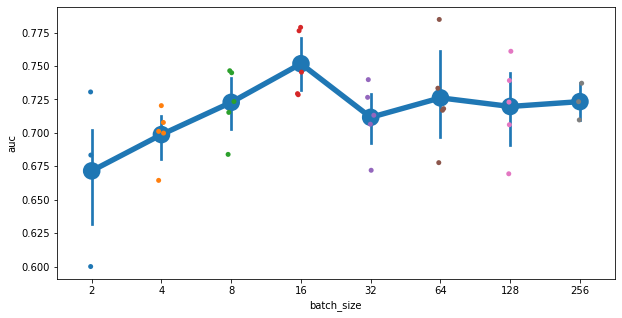

In [129]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=results_df, x=results_df.batch_size, y="auc", scale=2,ax=axs)
sns.stripplot(data=results_df, x=results_df.batch_size, y="auc", jitter=.05, ax=axs)
    

## Analysis of old Aymeric gridsearch

In [ ]:
excluded_conditions = []

results_df = show_results(
    dir_path="/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/trained_on_HCP_half_2/different-batch-sizes",
    dataset='cingulate_ACCpatterns_0',
    excluded_conditions=excluded_conditions,
    show=False,
    key_name='batch_size')

len(results_df)

In [15]:
# directories are supposed to have a certain structure and name patterns
def get_results_table(dir_path, model_types=['convnet', 'densenet2'], verbose=False):
    results = {k: {} for k in model_types}

    for model_type in os.listdir(dir_path):
        if model_type in model_types:
            if verbose:
                print(model_type)
            path = os.path.join(dir_path, model_type)
            for params in os.listdir(path):
                params_path = os.path.join(path, params)
                if os.path.isdir(params_path):
                    if verbose:
                        print(params)
                    
                    n_models = 0

                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = 0
                        results[model_type]['no_foldlabel_'+params] = 0
                    else:    
                        results[model_type][params] = 0
                    
                    for model in os.listdir(params_path):
                        model_path = os.path.join(params_path, model)
                        # start a model name by & to filter it out of the performance analysis
                        if os.path.isdir(model_path) and model[0] != '&':
                            if verbose:
                                print(model)

                            n_models += 1

                            if model_type == 'pca':
                                values = os.path.join(params_path, model, 'values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type]['foldlabel_'+params] += values['cross_val_auc'][0]
                                results[model_type]['no_foldlabel_'+params] += values['cross_val_auc'][0]
                            else:
                                values = os.path.join(params_path, model, 'cingulate_ACCpatterns_embeddings/values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type][params] += values['cross_val_auc'][0]
                    
                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = results[model_type]['foldlabel_'+params]/n_models
                        results[model_type]['no_foldlabel_'+params] = results[model_type]['no_foldlabel_'+params]/n_models
                    else:
                        results[model_type][params] = results[model_type][params]/n_models
    
    results_df = pd.DataFrame(results)
    results_df.sort_index(inplace=True)
    return results_df

In [16]:
dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders"
results_df = get_results_table(dir_path, model_types=['convnet', 'densenet2', 'pca'])

results_df.to_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/performance_comparison_5000.csv")

results_df

,convnet,densenet2,pca
foldlabel_30,0.613729,0.658608,0.595418
foldlabel_4,0.589703,0.574395,0.538784
no_foldlabel_30,0.649748,0.575910,0.595418
no_foldlabel_4,0.514435,0.488433,0.538784
